In [84]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

<h2> Loading Data <h2>

In [91]:
arr2= np.load('data_array_non_formatted.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]
### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[2200000 6.313465 121.0 ... 1 0 0]
 [120 7.983666 121.0 ... 1 0 0]
 [24000000 11.264845 120.0 ... 0 1 0]
 ...
 [22000000 11.953055 106.0 ... 0 0 0]
 [28000000 6.062425 91.0 ... 0 1 0]
 [13000000 5.607508 114.0 ... 1 0 0]] ['Average' 'Average' 'Average' ... 'Average' 'Bad' 'Average']
5253 5253 1314 1314


<h2> Decision Tree Classifier <h2>

In [92]:
###Classify using decision tree (DT) classifer

from sklearn.tree import DecisionTreeClassifier #import the DT classifier

clf1 = DecisionTreeClassifier() #declare a DT classifier
clf1.fit(X_train, y_train); #train the classifier

print (clf1.score (X_test, y_test)) # print the testing score(accuracy)
print (clf1.score (X_train, y_train)) # print the trainig score(accuracy)


0.6971080669710806
1.0


<h2> Finding best min_samples_split <h2>

In [93]:
from sklearn.metrics import f1_score
#We want to change min_samples_split for a range and find the best value

test_score = []
train_score = []
min_samples_split = []
f1_scores = []

for i in range(2,151):
    clf = DecisionTreeClassifier(min_samples_split = i)
    clf.fit(X_train, y_train)
    test_score.append(clf.score (X_test, y_test))
    train_score.append(clf.score (X_train, y_train))
    min_samples_split.append(i)   
    y_pred =clf.predict(X_test)
    f1_scores.append(f1_score(y_test,y_pred,average='weighted'))
    
df = pd.DataFrame(list(zip(min_samples_split,test_score,train_score,f1_scores)),columns = ['min_samples_split','test_score','train_score','f1_scores'])

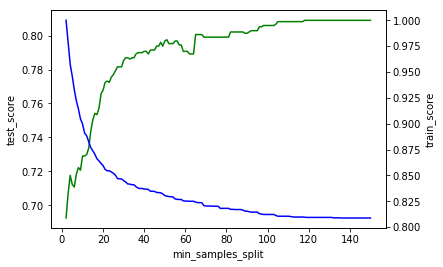

In [94]:
#Plot train and test score as min_samples needed to split increases
sns.lineplot(x=df['min_samples_split'],y=df['test_score'], color="g")
ax2 = plt.twinx()
sns.lineplot(x= df['min_samples_split'],y=df['train_score'], color="b", ax=ax2, legend='brief')
#Label for train_score is right
#label for test_score (BLUE) is left

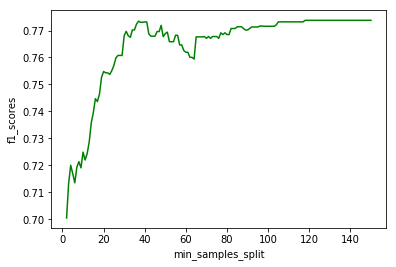

In [95]:
sns.lineplot(x= df['min_samples_split'],y=df['f1_scores'], color="g")
plt.show()

In [96]:
#Based on the f1_score, lets find the best value for max_leaf_nodes
print("Best Row based on f1_score")
maxF1Score = df['f1_scores'].idxmax()
print(df.iloc[maxF1Score])

Best Row based on f1_score
min_samples_split    118.000000
test_score             0.808980
train_score            0.809633
f1_scores              0.773775
Name: 116, dtype: float64


<h2> Finding best max_leaf_nodes <h2>

In [97]:
from sklearn.metrics import f1_score

#We want to change max_leaf_nodes for a range and find the best value (with the best min_samples_split param)

test_score = []
train_score = []
max_leaf_nodes = []
f1_scores = []

for i in range(5,200):
    clf = DecisionTreeClassifier(max_leaf_nodes = i,min_samples_split=118)
    clf.fit(X_train, y_train)
    test_score.append(clf.score (X_test, y_test))
    train_score.append(clf.score (X_train, y_train))
    max_leaf_nodes.append(i)   
    y_pred =clf.predict(X_test)
    f1_scores.append(f1_score(y_test,y_pred,average='weighted'))
    
df = pd.DataFrame(list(zip(max_leaf_nodes,test_score,train_score,f1_scores)),columns = ['max_leaf_nodes','test_score','train_score','f1_scores'])

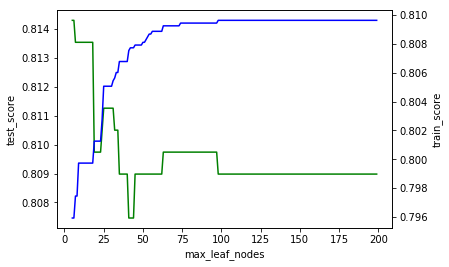

In [98]:

sns.lineplot(x=df['max_leaf_nodes'],y=df['test_score'], color="g")
ax2 = plt.twinx()
sns.lineplot(x= df['max_leaf_nodes'],y=df['train_score'], color="b", ax=ax2, legend='brief')
#Label for train_score is right
#label for test_score (BLUE) is left

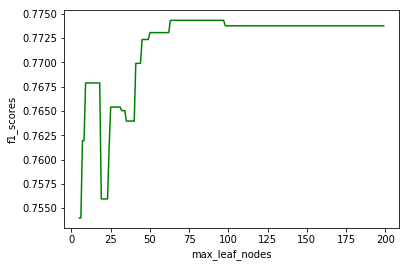

In [99]:
sns.lineplot(x= df['max_leaf_nodes'],y=df['f1_scores'], color="g")
plt.show()

In [100]:
#Based on the f1_score, lets find the best value for max_leaf_nodes
print("Best Row based on f1_score")
maxF1Score = df['f1_scores'].idxmax()
print(df.iloc[maxF1Score])

Best Row based on f1_score
max_leaf_nodes    63.000000
test_score         0.809741
train_score        0.809252
f1_scores          0.774339
Name: 58, dtype: float64


<h2> Results <h2>

In [101]:
#Based on the above, we can see that the min_samples_split = 115 and max_leaf_nodes = 63
 
#lets make sure that the results are consistent with different results

test_score = []
train_score = []
f1_scores = []

clf = DecisionTreeClassifier(max_leaf_nodes = 63,min_samples_split=115) #declare my tree
#check 50 times with data
for i in range(50):
    X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20)
    clf.fit(X_train, y_train)
    test_score.append(clf.score (X_test, y_test))
    train_score.append(clf.score (X_train, y_train))
    y_pred =clf.predict(X_test)
    f1_scores.append(f1_score(y_test,y_pred,average='weighted'))
    

df = pd.DataFrame(list(zip(test_score,train_score,f1_scores)),columns = ['test_score','train_score','f1_scores'])    


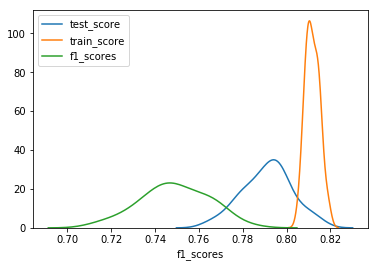

In [102]:
#lets check how the values are distributed when we use random training and testing data

for col in df.columns:
    sns.distplot(df[col],hist=False,label=col)

<h4> We can see that there is not a great variation between the scores in random models, so we can move forward</h4>

F1 Score: 0.76780693259226
Confusion Matrix values 
 [[1011   27   15]
 [  22  145    2]
 [   5    0   87]]


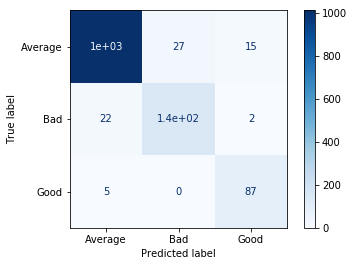

In [104]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#lets plot the f1 scores for the final model

y_pred =clf.predict(X_test)

print('F1 Score:',f1_score(y_test,y_pred,average='weighted'))

#Lets print confision matrix
labels =['Average','Bad','Good']
y_pred =clf1.predict(X_test)

print('Confusion Matrix values \n',confusion_matrix(y_test, y_pred))

disp = plot_confusion_matrix(clf1, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

In [105]:
#lets print classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Average       0.97      0.96      0.97      1053
         Bad       0.84      0.86      0.85       169
        Good       0.84      0.95      0.89        92

    accuracy                           0.95      1314
   macro avg       0.88      0.92      0.90      1314
weighted avg       0.95      0.95      0.95      1314



In [106]:
#Saving the tree as a pdf

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.externals.six import StringIO  
import pydot 

dot_data = StringIO() 
features =['budget', 'popularity', 'runtime', 'Action','Adventure', 'Comedy', 'Crime', 'Drama', 'Horror', 'Thriller']
tree.export_graphviz(clf1, out_file=dot_data, feature_names = features) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

graph[0].write_pdf("decisionTreeMoviesnonFdata.pdf")  # must access graph's first element

C:\Users\Tasli\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
